# Free Python Scripts for Sitewide Link Quality

This is a FREE collaboration between [@alton_lex](https://twitter.com/alton_lex) and https://FatJoe.com

README for more details: https://github.com/FrontAnalyticsInc/data-winners/tree/main/analysis-sitewide-link-quality

- Additional PAID resources and services are available from each of the collaborators.

- More scripts at https://github.com/FrontAnalyticsInc/data-winners



### About Me

My name is Alton Alexander. I am a Data Science consultant turned entreprenuer building SaaS tools for SEO.

Find me on Twitter [@alton_lex](https://twitter.com/alton_lex).

Learn more in my course on Gumroad: [Data Analytics for SEO](https://datawinners.gumroad.com/l/data-analytics-for-seo) (donations welcome;)

# Input Variables

In [22]:
# QUICKSTART: Simply change the domain and run the full script in jupyter > Cell > Run All
# set the domain variable for which site you want to analize

homepage = "https://startingstrongmans.com"
homepage

'https://startingstrongman.com'

# Setup

All functions can run for free unless otherwise indicated

In [142]:
# install dependencies

!pip install advertools
!pip install matplotlib
!pip install bs4
!pip install 

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done


  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=f57cb1873958b03de6b0bb0ed7e114a2e4e174bf4fb414071fdbdf46b4e0f0d9
  Stored in directory: /home/alton/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [144]:
# for the two paid metrics
!pip install google-search-results

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [46]:
# load libraries

import os
import requests
import advertools as adv
import pandas as pd
import urllib.parse
from bs4 import BeautifulSoup

import matplotlib

# Helper functions

In [38]:

# pull sitemap and store as a variable
def pull_sitemap( homepage ):
    
    # check the robots file using advertools
    sitemap_df = adv.sitemap_to_df(homepage+"/robots.txt")
    
    return sitemap_df

sitemap_df = pull_sitemap( homepage )
sitemap_df

2023-01-25 17:05:13,468 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://startingstrongman.com/sitemap-1.xml
2023-01-25 17:05:13,700 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://startingstrongman.com/image-sitemap-1.xml
2023-01-25 17:05:14,071 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://startingstrongman.com/news-sitemap.xml
2023-01-25 17:05:14,936 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://startingstrongman.com/event-sitemap.xml
2023-01-25 17:05:15,103 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://startingstrongman.com/category-sitemap.xml
2023-01-25 17:05:15,116 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://startingstrongman.com/location-sitemap.xml
2023-01-25 17:05:15,117 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://startingstrongman.com/author-sitemap.xml
2023-01-25 17:05:15,129 | INFO | sitemaps.py:536 | sitemap_to_df | Getting https://startingstrongman.com/page-sitemap.xml
2023-01-25 17

,loc,lastmod,sitemap,sitemap_size_mb,download_date,image_loc,image
0,https://startingstrongman.com/,NaT,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
1,https://startingstrongman.com/under-construction/,2017-07-02 14:25:41+00:00,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
2,https://startingstrongman.com/strongman-records/,2021-12-09 19:56:10+00:00,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
3,https://startingstrongman.com/donation-confirm...,2017-07-03 04:47:44+00:00,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
4,https://startingstrongman.com/donation-failed/,2017-07-03 04:47:44+00:00,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
...,...,...,...,...,...,...,...
2279,https://startingstrongman.com/2022/06/20/stron...,2022-06-20 18:31:02+00:00,https://startingstrongman.com/post-sitemap.xml,0.146463,2023-01-26 00:05:15.338129+00:00,https://startingstrongman.com/wp-content/uploa...,\n\t\t\t
2280,https://startingstrongman.com/2022/07/29/what-...,2022-07-29 18:30:13+00:00,https://startingstrongman.com/post-sitemap.xml,0.146463,2023-01-26 00:05:15.338129+00:00,NaN,NaN
2281,https://startingstrongman.com/2022/07/29/histo...,2022-07-29 18:48:47+00:00,https://startingstrongman.com/post-sitemap.xml,0.146463,2023-01-26 00:05:15.338129+00:00,NaN,NaN
2282,https://startingstrongman.com/2022/09/20/the-p...,2022-10-07 16:23:19+00:00,https://startingstrongman.com/post-sitemap.xml,0.146463,2023-01-26 00:05:15.338129+00:00,NaN,NaN


# 1) Ratio of URLs to Outbound Links



In [100]:
# custom function

def count_links( page_url, domain ):
    """Given input page_url, output the total number of outbound links"""
    links_internal = {}
    links_external = {}
    
    # download the html
    res = requests.get(page_url)
    if "html" not in res.headers.get('Content-Type'):
        # this is an image
        return {'parseable': False}
    
    html = res.text
    soup = BeautifulSoup(html)
    
    for a in soup.find_all('a'):
        link = a.get('href')

        # skip missing
        if link is None:
            continue

        # remove params
        link = link.split("?")[0]
        # remove shortcuts
        link = link.split("#")[0]

        # skip missing
        if (link is None) or (link == ''):
            continue

        if (domain in link) or (len(link)>1 and link[0:1]=="/") or (len(link)>2 and link[0:2]=="./"):
            # is internal
            links_internal[link]= links_internal.get(link,0) + 1
        else:
            # external
            links_external[link]= links_external.get(link,0) + 1

    return {"parseable": True, "external": links_external, "internal": links_internal }


domain = urllib.parse.urlparse(homepage).netloc

# test one url
page_url = sitemap_df.iloc[0]['loc']
print(page_url)

links = count_links( page_url, domain )
links

https://startingstrongman.com/


{'parseable': True,
 'external': {'https://shop.spreadshirt.com/startingstrongman/': 1,
  'https://www.amazon.com/shop/startingstrongman': 1,
  'https://docs.google.com/forms/d/e/1FAIpQLSeFiGSx35JO2dvNihBn8Hgf-uNsTjUTu07BG7HVJSK8v-j3kQ/viewform': 1,
  'http://us.sbdapparel.com': 1,
  'http://strengthshopusa.com': 1,
  'https://www.aweber.com/permission.htm': 1,
  'https://www.youtube.com/watch': 1},
 'internal': {'https://startingstrongman.com/': 4,
  'http://store.startingstrongman.com': 1,
  'http://store.startingstrongman.com/product/online-coaching/': 1,
  'https://startingstrongman.com/programs/': 2,
  'https://store.startingstrongman.com/product/train-strongman-regular-gym/': 2,
  'https://store.startingstrongman.com/product/starting-strongman-training-templates/': 1,
  'https://store.startingstrongman.com/product/the-cube-method-for-strongman-prime/': 1,
  'https://store.startingstrongman.com/product/cube-method-for-strongman-3/': 1,
  'https://store.startingstrongman.com/produc

In [109]:
# We can ESTIMATE the ratio based on a random sample of pages

# sample 25% of the site
sample_size = 0.25 
# not more than n number of pages
max_n_samples = 40

In [110]:
# table of pages to test
subset_of_sitemap_df = sitemap_df.sample(min(max_n_samples, round(sample_size*len(sitemap_df))))

# get domain
domain = urllib.parse.urlparse(homepage).netloc

# links per page
links_per_page = []

# get count of external links per page
for index, row in subset_of_sitemap_df.iterrows():
    
    page_url = row['loc']
    
    # count outbound links
    links = count_links( page_url, domain)
    
    # keep track of links per page
    if links.get('parseable'):
        external_links = len( links['external'] )
        links_per_page.append( external_links )
        
        print(external_links, "external links on ", page_url)

19 external links on  https://startingstrongman.com/2018/03/28/strong-talk-podcast-114-stan-efferding/
30 external links on  https://startingstrongman.com/2020/11/03/americas-strongest-man-2020-preview/
7 external links on  https://startingstrongman.com/tag/world-championship/
22 external links on  https://startingstrongman.com/2018/01/18/strong-talk-podcast-108-eric-dawson/
12 external links on  https://startingstrongman.com/2019/05/24/memorial-day-sale/
14 external links on  https://startingstrongman.com/2022/04/25/how-to-choose-the-right-squat-rack-5-quick-tips/
7 external links on  https://startingstrongman.com/tag/log-clean-press/
21 external links on  https://startingstrongman.com/2019/10/25/worlds-ultimate-strongman-results-recap/
20 external links on  https://startingstrongman.com/2017/09/30/giants-live-finals-preview-how-to-watch/
7 external links on  https://startingstrongman.com/tag/netflix/
20 external links on  https://startingstrongman.com/2015/07/07/conans-wheel-the-whee

In [111]:
# sitewide average links per page (SAMPLED)
avg = sum(links_per_page)/len(links_per_page)
print( "on average", avg, "links per page")

on average 17.3125 links per page


# 2) Pages published per year

In [112]:
# using code by Elias Dubas

# we've already pulled all the sitemap above

sitemap_df

,loc,lastmod,sitemap,sitemap_size_mb,download_date,image_loc,image
0,https://startingstrongman.com/,NaT,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
1,https://startingstrongman.com/under-construction/,2017-07-02 14:25:41+00:00,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
2,https://startingstrongman.com/strongman-records/,2021-12-09 19:56:10+00:00,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
3,https://startingstrongman.com/donation-confirm...,2017-07-03 04:47:44+00:00,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
4,https://startingstrongman.com/donation-failed/,2017-07-03 04:47:44+00:00,https://startingstrongman.com/sitemap-1.xml,0.063519,2023-01-26 00:05:13.491122+00:00,NaN,NaN
...,...,...,...,...,...,...,...
2279,https://startingstrongman.com/2022/06/20/stron...,2022-06-20 18:31:02+00:00,https://startingstrongman.com/post-sitemap.xml,0.146463,2023-01-26 00:05:15.338129+00:00,https://startingstrongman.com/wp-content/uploa...,\n\t\t\t
2280,https://startingstrongman.com/2022/07/29/what-...,2022-07-29 18:30:13+00:00,https://startingstrongman.com/post-sitemap.xml,0.146463,2023-01-26 00:05:15.338129+00:00,NaN,NaN
2281,https://startingstrongman.com/2022/07/29/histo...,2022-07-29 18:48:47+00:00,https://startingstrongman.com/post-sitemap.xml,0.146463,2023-01-26 00:05:15.338129+00:00,NaN,NaN
2282,https://startingstrongman.com/2022/09/20/the-p...,2022-10-07 16:23:19+00:00,https://startingstrongman.com/post-sitemap.xml,0.146463,2023-01-26 00:05:15.338129+00:00,NaN,NaN


In [121]:
sitemap_df['year'] = sitemap_df['loc'].str.extract(r'(/\d{4}/)')

In [130]:
# assuming that the YYYY is in the path

pages_per_year = sitemap_df.groupby('year').agg({'loc':'count'})

In [131]:
pages_per_year

,loc
year,
/2014/,3
/2015/,39
/2016/,1
/2017/,282
/2018/,310
/2019/,178
/2020/,197
/2021/,83
/2022/,57


<AxesSubplot: xlabel='year'>

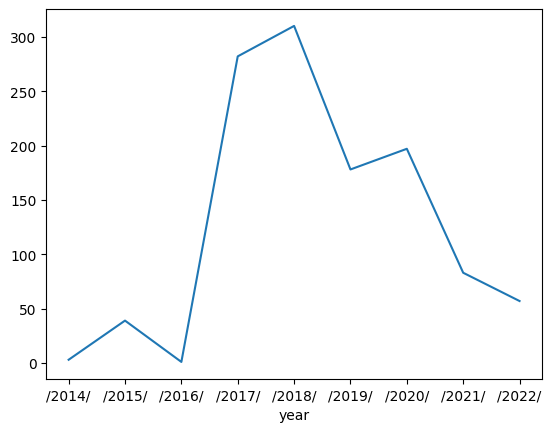

In [141]:
# pages per year
pages_per_year['loc'].plot.line()

# 3) Traffic/Pages Ratio

In [170]:
# use PAID api to get paid and organic traffic from


# get your api password from dataforseo.com
# download and include the rest client
api_username_dataforseo = os.getenv("DATAFORSEO_USERNAME")
api_password_dataforseo = os.getenv("DATAFORSEO_PASSWORD")

def traffic_estimate( domain ):
    
    from client import RestClient
    
    # You can download this file from here https://cdn.dataforseo.com/v3/examples/python/python_Client.zip
    client = RestClient(api_username_dataforseo, api_password_dataforseo)
    post_data = dict()
    # simple way to set a task
    post_data[len(post_data)] = dict(
        target=domain,
        location_name="United States",
        language_name="English"    
    )
    # POST /v3/dataforseo_labs/google/domain_rank_overview/live
    response = client.post("/v3/dataforseo_labs/google/domain_rank_overview/live", post_data)
    # you can find the full list of the response codes here https://docs.dataforseo.com/v3/appendix/errors
    if response["status_code"] == 20000:
        print(response)
        # do something with result
    else:
        print("error. Code: %d Message: %s" % (response["status_code"], response["status_message"]))

    
    return response

In [169]:
response

{'version': '0.1.20221214',
 'status_code': 20000,
 'status_message': 'Ok.',
 'time': '0.1977 sec.',
 'cost': 0.0101,
 'tasks_count': 1,
 'tasks_error': 0,
 'tasks': [{'id': '01260309-4765-0388-0000-88e8f3031a2f',
   'status_code': 20000,
   'status_message': 'Ok.',
   'time': '0.1374 sec.',
   'cost': 0.0101,
   'result_count': 1,
   'path': ['v3', 'dataforseo_labs', 'google', 'domain_rank_overview', 'live'],
   'data': {'api': 'dataforseo_labs',
    'function': 'domain_rank_overview',
    'se_type': 'google',
    'target': 'startingstrongman.com',
    'location_name': 'United States',
    'language_name': 'English'},
   'result': [{'se_type': 'google',
     'target': 'startingstrongman.com',
     'location_code': 2840,
     'language_code': 'en',
     'total_count': 1,
     'items_count': 1,
     'items': [{'se_type': 'google',
       'location_code': 2840,
       'language_code': 'en',
       'metrics': {'organic': {'pos_1': 33,
         'pos_2_3': 81,
         'pos_4_10': 410,
    

In [185]:

# if environment variable is set then continue
if api_username_dataforseo and api_password_dataforseo:
    
    # estimated traffic
    response = traffic_estimate( domain )    
    # compute ratio

else:
    print("get api creds first !!!")

get api creds first !!!


In [186]:
# avg traffic per page

etv = response['tasks'][0]['result'][0]['items'][0]['metrics']['organic']['etv']

ratio_traffic = etv/len(sitemap_df)
ratio_traffic

4.024153816225024

# 4) Sitemap Links compared to Indexed Links

In [166]:
# this metric requires a paid subscription to serpapi
# alternatives exist but this is fast, easy and reliable


from serpapi import GoogleSearch# get api_key
api_key_serpapi = os.getenv("API_KEY_SERPAPI")

domain = urllib.parse.urlparse(homepage).netloc

# do a site:domain.com search
query = "site:"+domain

params = {
  "q": query,
  "hl": "en",
  "gl": "us",
  "api_key": api_key_serpapi
}

if api_key_serpapi:
    res = GoogleSearch(params)
    res_json = res.get_json()
else:
    print("add your serpapi key first!! ")

add your serpapi key first!! 


In [161]:
total_indexed_results = res_json['search_information']['total_results']

In [165]:
# determine the ratio of indexed links

ratio_indexed = total_indexed_results/len(sitemap_df)
ratio_indexed

0.44220665499124345